In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
# Standardiation
from sklearn.preprocessing import StandardScaler
# Model
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
# Metrics
from sklearn.metrics import accuracy_score
# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Part 0 - Import dataframe

In [ ]:
df=pd.read_csv('/content/heart_failure.csv')

In [ ]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Part 1 - Choose 90 samples randomly and Preprocess dataframe

<Axes: xlabel='age', ylabel='Count'>

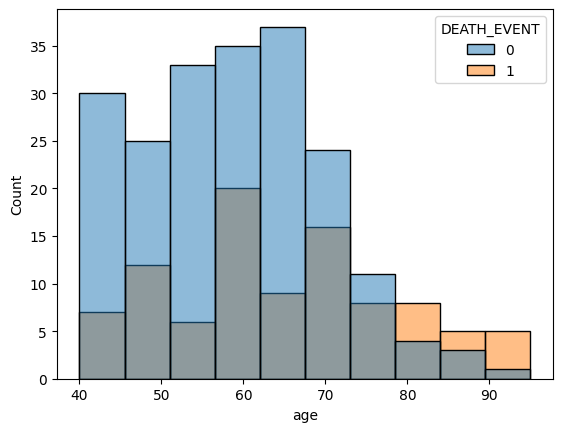

In [ ]:
sns.histplot(data=df,x="age",hue='DEATH_EVENT')

In [ ]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
dead_df = df.loc[df.DEATH_EVENT==1].sample(90, replace=False)
alive_df = df.loc[df.DEATH_EVENT==0].sample(90, replace=False)
df = pd.concat([dead_df, alive_df]).sample(frac=1).reset_index(drop=True)

In [ ]:
df.DEATH_EVENT.value_counts()

1    90
0    90
Name: DEATH_EVENT, dtype: int64

# Part 2 - Distribution of data

### Plot for binary

In [ ]:
columns_binary=['diabetes','high_blood_pressure','sex','smoking','anaemia']

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', data=df)

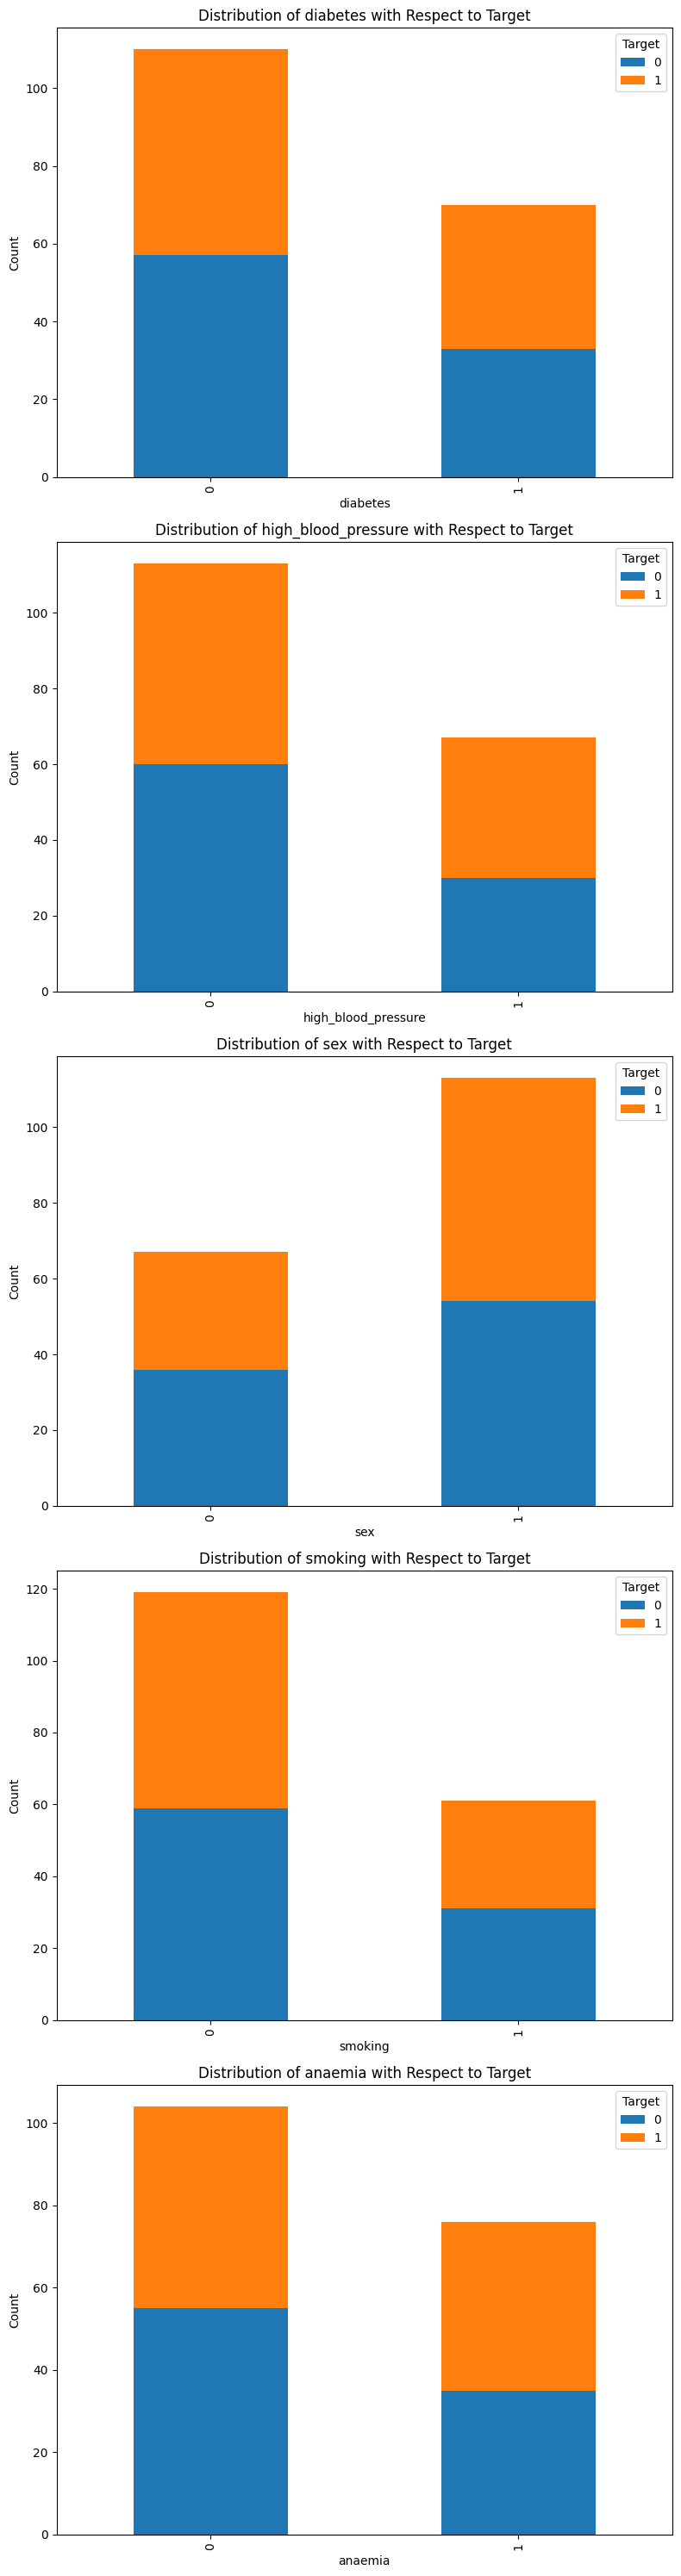

In [ ]:
fig, axes = plt.subplots(nrows=len(columns_binary), ncols=1, figsize=(8, 6 * len(columns_binary)))

for i, column_name in enumerate(columns_binary):
    grouped_data = df.groupby(column_name)['DEATH_EVENT'].value_counts().unstack()

    ax = axes[i]
    grouped_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {column_name} with Respect to Target')

    if len(grouped_data.columns) > 1:
        ax.legend(title='Target', loc='upper right')

plt.tight_layout()

plt.show()


### Plor for none binary

In [ ]:
none_binary_df=df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_sodium','DEATH_EVENT']]

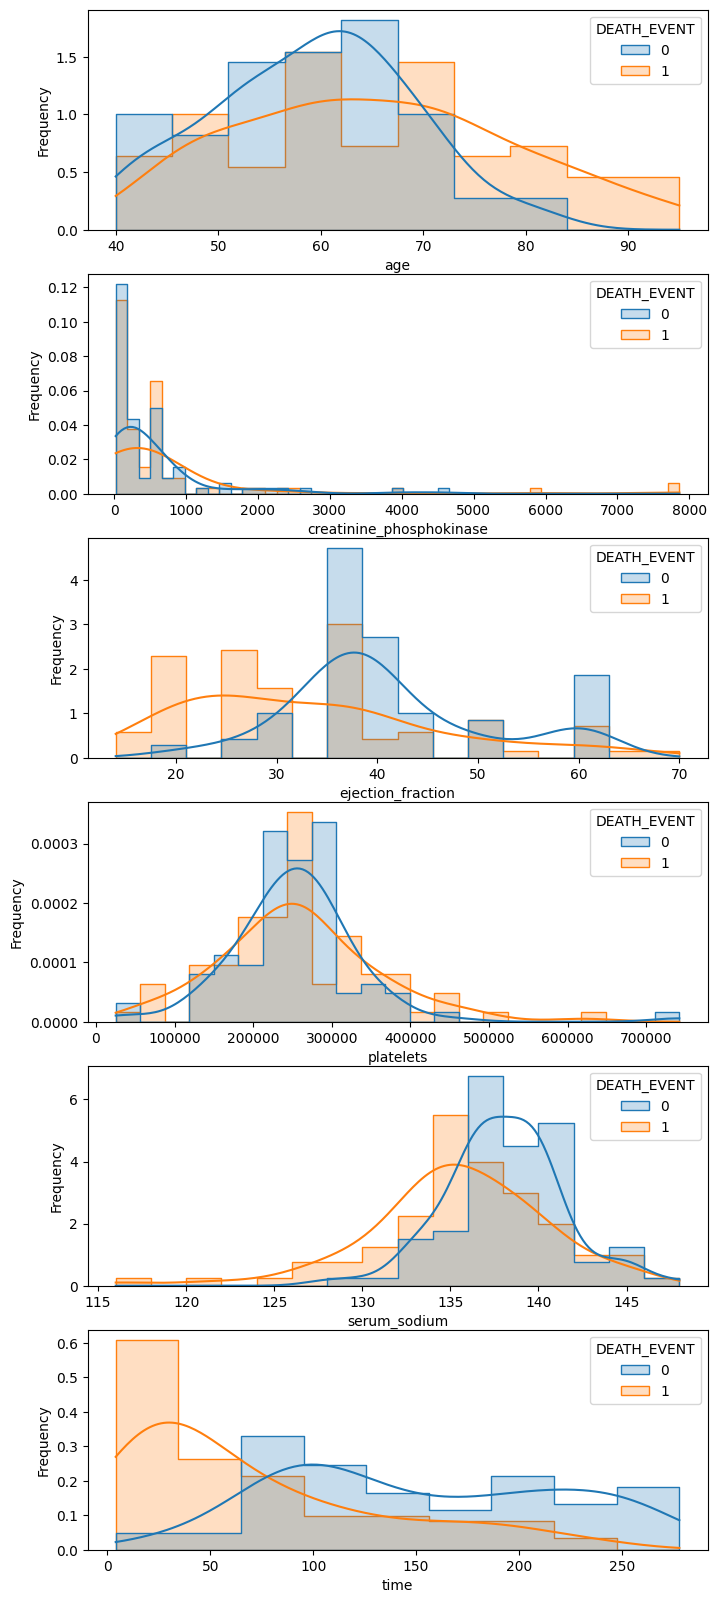

In [ ]:
fig,ax=plt.subplots(nrows=6, figsize=(8, 20))
for index,col in enumerate(['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_sodium']):
    sns.histplot(data=none_binary_df, x=col, hue='DEATH_EVENT', ax=ax[index],element='step', kde=True, stat='frequency')


In [ ]:
df_count=df.groupby(['time','DEATH_EVENT']).size().reset_index(name='Counts')
df_count

,time,DEATH_EVENT,Counts
0,4,1,1
1,6,1,1
2,7,1,2
3,8,1,2
4,10,1,6
...,...,...,...
124,256,0,1
125,258,0,2
126,270,0,1
127,271,0,1


<Axes: xlabel='time'>

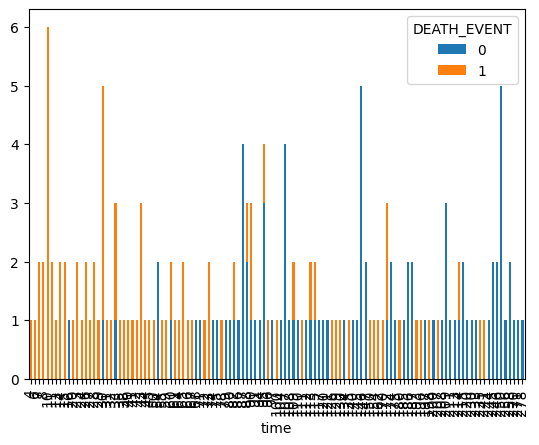

In [ ]:
df_count=df.groupby(['time','DEATH_EVENT']).size().unstack(fill_value=0)
df_count.plot(kind='bar', stacked=True)

# Part 2.1 - Train Test Function

In [ ]:
def train_test(X,y):
  X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33, random_state=42)
  return X_train, X_test, y_train, y_test

# Part 3 - Create SVM model

#### Use GrideSearch to find best parameter

In [ ]:
X_train, X_test, y_train, y_test=train_test(df.loc[:,df.columns != 'DEATH_EVENT'],df['DEATH_EVENT'])

In [ ]:
param_grid={
'svc__kernel' :['linear', 'rbf', 'poly'],
'svc__gamma' : [0.1, 1, 10, 100] ,
'svc__C' : [ 1, 10, 100, 1000],
}

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
pipeline=make_pipeline(StandardScaler(),SVC())

In [ ]:
gread_search=GridSearchCV(pipeline,param_grid,cv=kf)

In [ ]:
gread_search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1, 10, 100, 1000],
                         'svc__gamma': [0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf', 'poly']})

In [ ]:
gread_search.best_params_

{'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

#### Create Model with best parames

In [ ]:
SVC_mod=SVC(C=100,gamma=0.1,kernel='rbf')

In [ ]:
pipeline_SVC=make_pipeline(StandardScaler(),SVC_mod)

In [ ]:
pipeline_SVC.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.1))])

In [ ]:
y_pred=pipeline_SVC.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7070707070707071

# Part 4 - Choose One column to predict accuracy

In [ ]:
df_anaemia=dataframe[['anaemia','DEATH_EVENT']]

In [ ]:
df_anaemia.head(5)

,anaemia,DEATH_EVENT
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1


In [ ]:
X_anaemia=df_anaemia['anaemia']
y_anaemia=df_anaemia['DEATH_EVENT']
X_anaemia=np.array(X_anaemia)
y_anaemia=np.array(y_anaemia)

In [ ]:
X_train, X_test, y_train, y_test=train_test(X_anaemia,y_anaemia)

In [ ]:
svc_model=SVC(C=100,gamma=0.1,kernel='rbf')

In [ ]:
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [ ]:
svc_model.fit(X_train,y_train)

SVC(C=100, gamma=0.1)

In [ ]:
y_pred=svc_model.predict(X_test)

### Use k-fold cross validation to calculate accuracy

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
X_anaemia=X_anaemia.reshape(-1,1)

In [ ]:
# Perform cross-validation
scores = cross_val_score(svc_model, X_anaemia, y_anaemia, cv=kfold)

In [ ]:
print("cross val score",scores)
print("mean score",scores.mean())
print("standard score",scores.std())

cross val score [0.5        0.5        0.55555556 0.52777778 0.52777778]
mean score 0.5222222222222223
standard score 0.020786985482077462


In [ ]:
accuracy_score(y_test,y_pred)

0.5

#Part 5 - Calculate accuracy for each columns

In [ ]:
columns_names=list(df.loc[:,df.columns != 'DEATH_EVENT'].columns)

In [ ]:
acc_scor={}

In [ ]:
class Model_Each_Column:
  def __init__(self,column,df,Multi_column):
    self.column=column
    self.df=df
    self.Multi_column=Multi_column
    pass
  def train_model(self):
    y=self.df['DEATH_EVENT']
    x=self.df[self.column]
    svc=SVC(C=100,gamma=0.1,kernel='rbf')
    if(self.Multi_column):
      X_train, X_test, y_train, y_test=train_test(x,y)
      svc.fit(X_train,y_train)
      y_pred=svc.predict(X_test)
      acc=accuracy_score(y_test,y_pred)
      return acc,x,y,svc
    X_train, X_test, y_train, y_test=train_test(np.array(x),np.array(y))
    svc.fit(X_train.reshape(-1,1),y_train)
    y_pred=svc.predict(X_test.reshape(-1,1))
    acc=accuracy_score(y_test,y_pred)
    return acc,np.array(x),np.array(y),svc
  def test_accuracy(self):
    acc,X,y,svc=self.train_model()
    if(self.Multi_column):
      return 'cross validation',cross_val_score(svc,X,y,cv=5, scoring='accuracy')[0] ,'accuracy' ,acc
    return 'cross validation', cross_val_score(svc,X.reshape(-1, 1),y,cv=5, scoring='accuracy') , 'accuracy' ,acc

In [ ]:
for column in columns_names:
   model=Model_Each_Column(column,df,False)
   acc_scor[column]=model.test_accuracy()


In [ ]:
acc_scor

{'age': ('cross validation',
  array([0.7       , 0.73333333, 0.65      , 0.66666667, 0.6779661 ]),
  'accuracy',
  0.6060606060606061),
 'anaemia': ('cross validation',
  array([0.66666667, 0.68333333, 0.68333333, 0.68333333, 0.6779661 ]),
  'accuracy',
  0.5757575757575758),
 'creatinine_phosphokinase': ('cross validation',
  array([0.65      , 0.68333333, 0.56666667, 0.61666667, 0.6779661 ]),
  'accuracy',
  0.5454545454545454),
 'diabetes': ('cross validation',
  array([0.66666667, 0.68333333, 0.68333333, 0.68333333, 0.6779661 ]),
  'accuracy',
  0.5757575757575758),
 'ejection_fraction': ('cross validation',
  array([0.7       , 0.65      , 0.73333333, 0.7       , 0.50847458]),
  'accuracy',
  0.5959595959595959),
 'high_blood_pressure': ('cross validation',
  array([0.66666667, 0.68333333, 0.68333333, 0.68333333, 0.6779661 ]),
  'accuracy',
  0.5757575757575758),
 'platelets': ('cross validation',
  array([0.6       , 0.65      , 0.7       , 0.63333333, 0.61016949]),
  'accuracy'

# Part 6 - Train Model With copule columns

In [ ]:
train_with_two_column={}

In [ ]:
columns=df.loc[:,df.columns !='DEATH_EVENT'].columns

In [ ]:
copul_columns=list(combinations(columns,2))

In [ ]:
for pair in copul_columns:
   class_1,class_2=pair
   model=Model_Each_Column([class_1,class_2],df,True)
   train_with_two_column[f'{pair}']=model.test_accuracy()

In [ ]:
train_with_two_column

{"('age', 'anaemia')": ('cross validation',
  0.65,
  'accuracy',
  0.5656565656565656),
 "('age', 'creatinine_phosphokinase')": ('cross validation',
  0.6,
  'accuracy',
  0.48484848484848486),
 "('age', 'diabetes')": ('cross validation',
  0.5833333333333334,
  'accuracy',
  0.5757575757575758),
 "('age', 'ejection_fraction')": ('cross validation',
  0.7,
  'accuracy',
  0.5757575757575758),
 "('age', 'high_blood_pressure')": ('cross validation',
  0.6666666666666666,
  'accuracy',
  0.6060606060606061),
 "('age', 'platelets')": ('cross validation',
  0.6166666666666667,
  'accuracy',
  0.5353535353535354),
 "('age', 'serum_creatinine')": ('cross validation',
  0.7333333333333333,
  'accuracy',
  0.6363636363636364),
 "('age', 'serum_sodium')": ('cross validation',
  0.6,
  'accuracy',
  0.6363636363636364),
 "('age', 'sex')": ('cross validation', 0.65, 'accuracy', 0.6161616161616161),
 "('age', 'smoking')": ('cross validation',
  0.6666666666666666,
  'accuracy',
  0.616161616161616